In [1]:
import os

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

c:\Users\tejas\Langchain-Basics\venv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [4]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, StateGraph, MessagesState
from langgraph.prebuilt import ToolNode

In [5]:
model = ChatGoogleGenerativeAI(model = "gemini-2.5-flash",temperature=0)

In [6]:
from langchain_core.tools import tool

In [7]:
@tool
def search(query: str):
    """Searches the web for a given query and returns the results."""
    if "hyd" in query.lower() or "hyderabad" in query.lower():
        return "The temperature is 24 degrees"
    return "It is sunny"

In [8]:
tools = [search]

In [9]:
tool_node = ToolNode(tools)

In [10]:
from typing import List,Literal

In [11]:
def call_model(state:MessagesState):
    messages = state["messages"]
    # Pass the messages as the positional 'input' argument expected by the model
    response = model.invoke({"messages": messages})
    return {"messages": response}

In [12]:
def should_continue(state:MessagesState):
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools_1"
    return END 

In [13]:
workflow = StateGraph(MessagesState)

In [14]:
workflow.add_node("agent",call_model)

In [15]:
workflow.add_node("tools_1",tool_node)

In [16]:
workflow.add_conditional_edges("agent",should_continue,)

In [17]:
workflow.set_entry_point("agent")

In [18]:
workflow.add_edge("tools_1", 'agent')

In [19]:
checkpoint = MemorySaver()

In [20]:
app = workflow.compile(checkpointer=checkpoint)

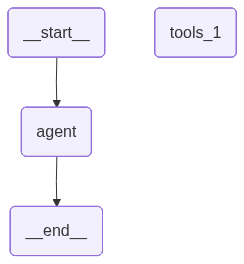

In [21]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [37]:
from langchain_core.messages import HumanMessage

In [44]:
final_state = app.invoke({"messages": [HumanMessage(content="what is the yesterdays weather in hyd?")]},config={"configurable": {"thread_id": 42}})

In [45]:
final_state

{'messages': [HumanMessage(content='what is the tomorrow weather in sf?', additional_kwargs={}, response_metadata={}, id='1bc4e48b-202a-4305-a3ef-2c19b432800e'),
  AIMessage(content='I can\'t give you real-time, up-to-the-minute weather forecasts for tomorrow in San Francisco, as that information changes frequently and I don\'t have live access to current weather data.\n\nHowever, you can easily find the most accurate forecast by checking a reliable weather source like:\n\n*   **Google Weather:** Just search "weather San Francisco tomorrow"\n*   **A weather app:** (e.g., The Weather Channel, AccuWeather, Apple Weather)\n*   **A local news website:** (e.g., KRON4, ABC7, SFGate weather section)\n\nGenerally, San Francisco weather is known for being mild, often foggy in the mornings, and can be breezy. Temperatures are usually in the 55-70°F (13-21°C) range, but it\'s always best to check the specific forecast for tomorrow\'s exact conditions, including any chance of rain or fog.', additi

In [46]:
final_state["messages"][-1].content

'I cannot give you the exact, real-time historical weather data for yesterday in Hyderabad (assuming you mean Hyderabad, India), as I don\'t have live access to past weather records.\n\nHowever, you can easily find this information by checking:\n\n*   **Google:** Search "weather Hyderabad yesterday" or "weather Hyderabad [yesterday\'s date]".\n*   **Weather Websites/Apps:** Many weather services like AccuWeather, The Weather Channel, or Weather Underground allow you to look up historical weather data for specific dates.\n*   **India Meteorological Department (IMD):** The official source for weather data in India often has archives.\n\nGenerally, Hyderabad experiences a tropical wet and dry climate. Depending on the time of year, yesterday\'s weather would likely have been:\n\n*   **Hot and dry:** If it was during the summer months (March to early June).\n*   **Warm and humid with a chance of rain:** If it was during the monsoon season (June to October).\n*   **Mild and pleasant:** If i